[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/066_gol/gol.ipynb)

# El Juego de la Vida en 5 niveles

intro


## Noob

Estás aprendiendo a programar

In [1]:
import random 

def init(Nx, Ny):
    C = [[0 for j in range(Nx)] for i in range(Ny)]
    for i in range(Ny):
        for j in range(Nx):
            C[i][j] = random.randint(0,1)
        return C
    
C0 = init(5, 5)
C0

[[0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

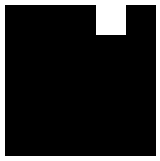

In [2]:
import matplotlib.pyplot as plt

def plot(C, ax=None):
    if ax is None:
        fig, ax = plt.subplots(dpi=50)
    ax.imshow(C, cmap="gray")
    ax.axis('off')
    
plot(C0)

In [3]:
def iter(C):
    Ny, Nx = len(C), len(C[0])
    C2 = [[0 for j in range(Nx)] for i in range(Ny)]
    for i in range(Ny):
        for j in range(Nx):
            c = C[i][j]
            # numero vecinos
    return C2

## Principante

Sabes que puedes hacerlo mejor


In [4]:
def init(Nx, Ny):
    C = [[0 for j in range(Nx+2)] for i in range(Ny+2)]
    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            C[i][j] = random.randint(0,1)
    return C
    
init(3, 3)

[[0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0],
 [0, 1, 1, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0]]

In [5]:
def iter(C):
    Ny, Nx = len(C) - 2, len(C[0]) - 2
    C2 = [[0 for j in range(Nx+2)] for i in range(Ny+2)]
    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            c = C[i][j]
            v = C[i][j+1] + C[i][j-1] + C[i-1][j] + C[i+1][j] + \
            C[i+1][j+1] + C[i+1][j-1] + C[i-1][j+1] + C[i-1][j-1]
            if c == 0:
                if v == 3:
                    C2[i][j] = 1
                else: 
                    C2[i][j] = 0
            else: 
                if v == 2 or v == 3:
                    C2[i][j] = 1
                else: 
                    C2[i][j] = 0
    return C2

In [6]:
def gol(C0, MAX_IT = 10):
    count = 0
    Cs = [C0]
    while count < MAX_IT:
        C = iter(C0)
        Cs.append(C)
        C0 = C
        count += 1
    return Cs

In [7]:
C0 = init(20, 20)
Cs = gol(C0)

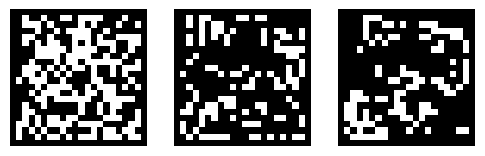

In [8]:
fig = plt.figure(dpi=100)
ax = plt.subplot(1, 3, 1)
plot(Cs[0], ax)
ax = plt.subplot(1, 3, 2)
plot(Cs[1], ax)
ax = plt.subplot(1, 3, 3)
plot(Cs[2], ax)
plt.show()

In [9]:
# animación

from matplotlib import animation, rc
rc('animation', html='html5')

def update(i):
    ax.clear()
    ax.imshow(Cs[i], cmap="gray")
    ax.axis('off')
    return ax
 
C0 = init(100, 100)
%time Cs = gol(C0, MAX_IT=100)

fig = plt.figure(dpi=50)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100)
plt.close()

anim

Wall time: 763 ms


## Intermedio

En busca de la performance

matrices

In [99]:
import numpy as np

def init(Nx, Ny):
    C = np.random.randint(0, 2, (Ny, Nx))
    #C = np.ones((Ny, Nx))
    return C
    
init(3, 3)

array([[1, 1, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [155]:
from scipy.sparse import csr_matrix

def vecinos(Nx, Ny):
    #V = np.zeros((Ny*Nx, Ny*Nx))
    data, indices, indptr = [], [], [0]
    for j in range(Ny*Nx):
        for i in range(Ny*Nx):
            if i == j:
                if i > 0 and i % Nx:
                    #V[i-1][j] = 1
                    data.append(1)
                    indices.append(i-1)
                if i < Ny*Nx - 1 and (i+1) % Nx:
                    #V[i+1][j] = 1
                    data.append(1)
                    indices.append(i+1)
                if i >= Nx:
                    #V[i-Nx][j] = 1
                    data.append(1)
                    indices.append(i-Nx)
                    if (i+1) % Nx:
                        #V[i-Nx+1][j] = 1
                        data.append(1)
                        indices.append(i-Nx+1)
                    if i % Nx:
                        #V[i-Nx-1][j] = 1
                        data.append(1)
                        indices.append(i-Nx-1)
                if i <= (Ny-1)*Nx - 1:
                    #V[i+Nx][j] = 1
                    data.append(1)
                    indices.append(i+Nx)
                    if i % Nx:
                        #V[i+Nx-1][j] = 1
                        data.append(1)
                        indices.append(i+Nx-1)
                    if (i+1) % Nx:
                        #V[i+Nx+1][j] = 1
                        data.append(1)
                        indices.append(i+Nx+1)
        indptr.append(len(indices))
    #return V
    return csr_matrix((data, indices, indptr))

Nx, Ny = 3, 3
vecinos(Nx, Ny).toarray()

array([[0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 0]])

In [166]:
C = init(Nx, Ny)
V = vecinos(Nx, Ny)

N = V.T.dot(C.ravel()).reshape(Ny, Nx)
N

array([[2, 3, 1],
       [4, 7, 4],
       [2, 3, 1]], dtype=int32)

In [167]:
C

array([[1, 1, 1],
       [1, 0, 0],
       [1, 1, 1]])

In [138]:
(C == 0) | (N == 3)

array([[ True, False,  True],
       [ True, False,  True],
       [ True,  True, False]])

In [168]:
def iter(C, V):
    Ny, Nx = C.shape
    C2 = np.zeros((Ny, Nx))
    #N = C.ravel().dot(V).reshape(Ny, Nx)
    N = V.T.dot(C.ravel()).reshape(Ny, Nx)
    C2[(C == 0) & (N == 3)] = 1
    C2[(C == 1) & ((N == 2) | (N == 3))] = 1
    return C2

In [169]:
def gol(C0, V, MAX_IT = 10):
    count = 0
    Cs = [C0]
    while count < MAX_IT:
        C = iter(C0, V)
        Cs.append(C)
        C0 = C
        count += 1
    return Cs

In [173]:
Nx, Ny = 1000, 1000
C0 = init(Nx, Ny)
V = vecinos(Nx, Ny)
%time Cs = gol(C0, V, MAX_IT=10)

fig = plt.figure(dpi=50)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100)
plt.close()

anim

KeyboardInterrupt: 

## Avanzado

No es suficiente

programación en paralelo

In [177]:
import torch

Vt = torch.from_numpy(V.toarray())
Vt.shape

torch.Size([10000, 10000])

In [182]:
Nx, Ny = 100, 100

C0 = torch.from_numpy(init(Nx, Ny))
V =  torch.from_numpy(vecinos(Nx, Ny).toarray())

MAX_IT = 10
count = 0
Cs = [C0]
while count < MAX_IT:
    C2 = torch.zeros(Ny, Nx)
    N = V.T @ C0.view(-1)
    N = N.reshape(Ny, Nx)
    C2[(C0 == 0) & (N == 3)] = 1
    C2[(C0 == 1) & ((N == 2) | (N == 3))] = 1
    Cs.append(C2)
    C0 = C2
    count += 1

RuntimeError: expected scalar type Int but found Float

In [ ]:
fig = plt.figure(dpi=50)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100)
plt.close()

anim

## Pro

Al límite

gpu

## Bonus: Nivel Dios

sparse

## Resumen

Esto sirve para redes neuronales, simulación de fluidos, etc.